In [21]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [22]:
MODULATOR_FREQUENCY = 1_000.0
CARRIER_FREQUENCY = 10_000.0
MODULATION_INDEX = 1.0

SAMPLES = 384_000.0

PLOT_OFFSET = 100_000
PLOT_SAMPLES = 30_000 + PLOT_OFFSET
PLOT_SCALE = (16, 8)

In [23]:
# Create an array of SAMPLES elements with their value constantly increasing
time = np.arange(SAMPLES) / SAMPLES
time = time / 20

print("max time:", max(time))

max time: 0.049999869791666665


In [24]:
def low_pass_filter(signal: List[float], tau: float) -> List[float]:
    output = np.zeros_like(signal)

    output[0] = tau * signal[0]
    for i in range(1, len(signal)):
        output[i] = output[i - 1] + tau * (signal[i] - output[i - 1])

    return output

In [25]:
def diode(signal: List[float]) -> List[float]:
    return [abs(s) for s in signal]

In [26]:
frequencies = np.arange(int(SAMPLES)) / 200.0

print('max frequency:', max(frequencies), 'Hz')

frequency_signal = np.sin(2.0 * np.pi * frequencies * time)

max frequency: 1919.995 Hz


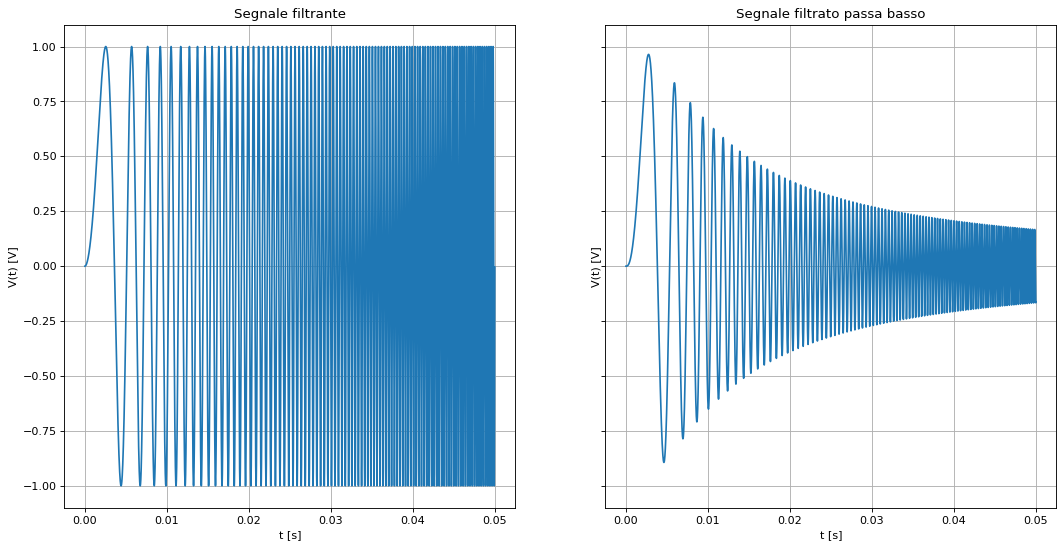

In [27]:
tau = 1 / (2 * np.pi * 300)
frequency_filtered = low_pass_filter(frequency_signal, tau)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=PLOT_SCALE, dpi=80)

ax1.plot(time, frequency_signal)
ax1.set_title('Segnale filtrante')
ax1.grid(True)
ax1.set_ylabel('V(t) [V]')
ax1.set_xlabel('t [s]')

ax2.plot(time, frequency_filtered)
ax2.set_title('Segnale filtrato passa basso')
ax2.grid(True)
ax2.set_ylabel('V(t) [V]')
ax2.set_xlabel('t [s]')

plt.savefig('doc/images/filtrato-test.png')

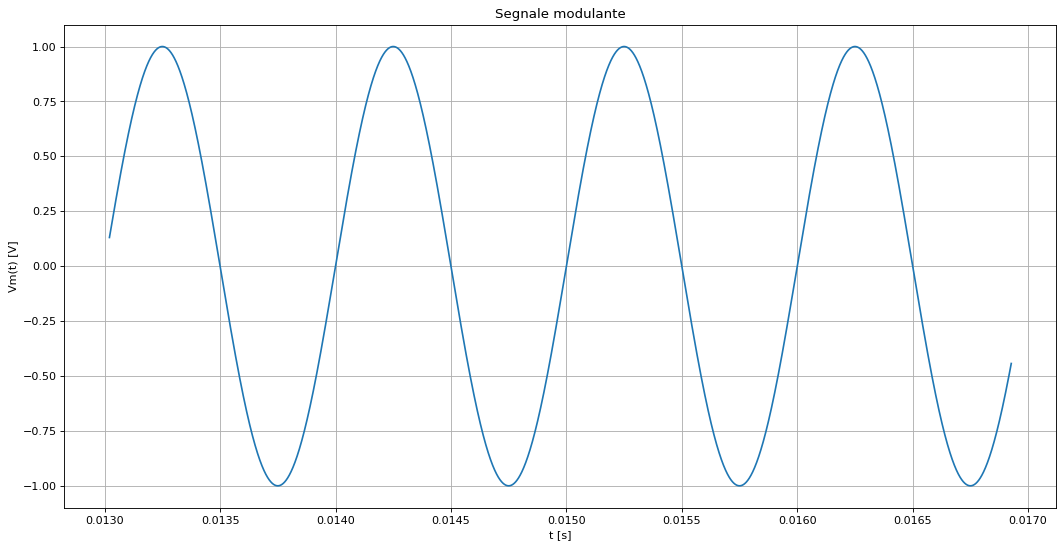

In [28]:
# Modulator signal
modulator = np.sin(2.0 * np.pi * MODULATOR_FREQUENCY * time) * MODULATION_INDEX

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale modulante')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], modulator[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('Vm(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/modulante.png')

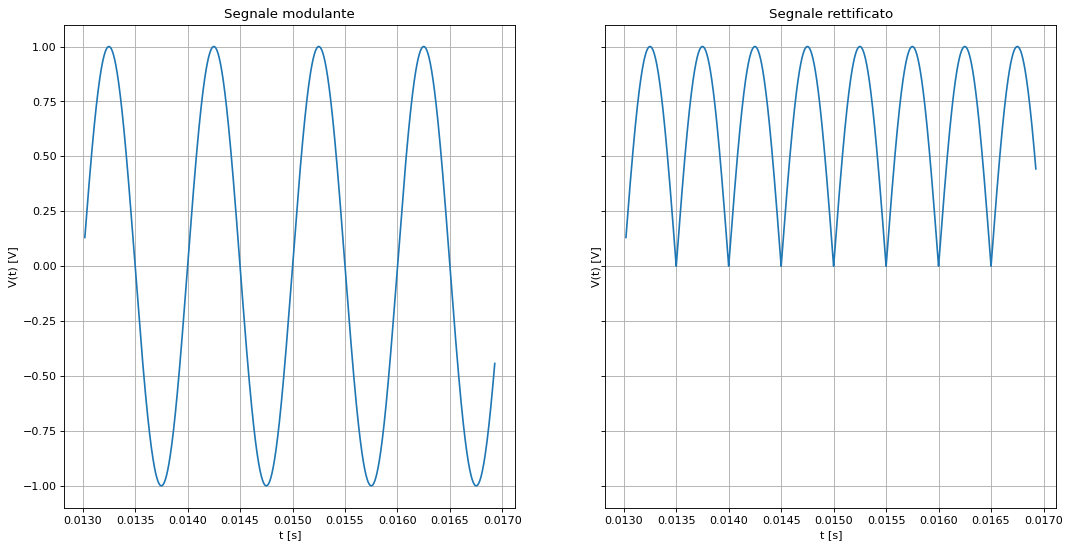

In [29]:
diode_output = diode(modulator)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=PLOT_SCALE, dpi=80)

ax1.plot(time[PLOT_OFFSET:PLOT_SAMPLES], modulator[PLOT_OFFSET:PLOT_SAMPLES])
ax1.set_title('Segnale modulante')
ax1.grid(True)
ax1.set_ylabel('V(t) [V]')
ax1.set_xlabel('t [s]')

ax2.plot(time[PLOT_OFFSET:PLOT_SAMPLES], diode_output[PLOT_OFFSET:PLOT_SAMPLES])
ax2.set_title('Segnale rettificato')
ax2.grid(True)
ax2.set_ylabel('V(t) [V]')
ax2.set_xlabel('t [s]')

plt.savefig('doc/images/diode.png')

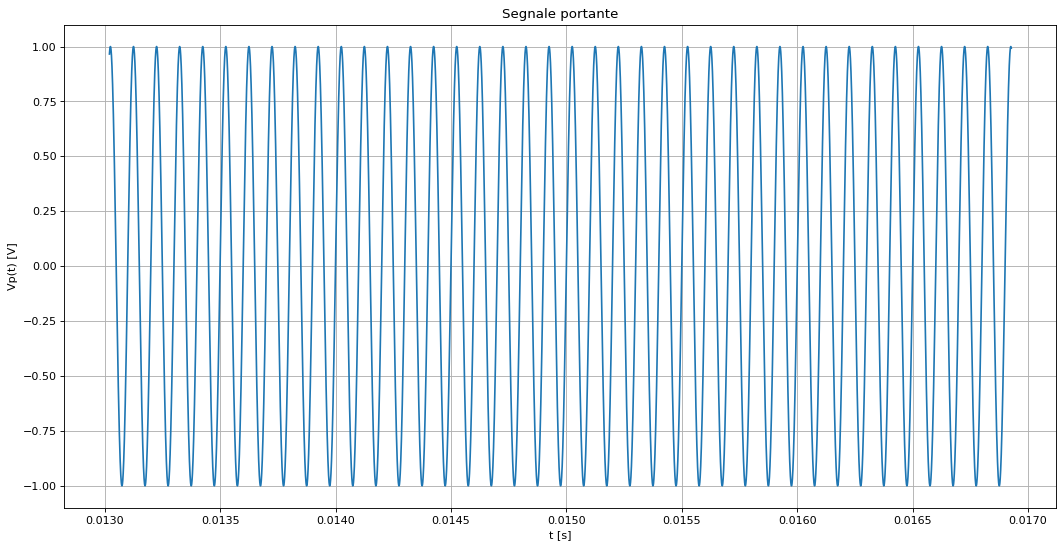

In [30]:
# Carrier signal
carrier = np.sin(2.0 * np.pi * CARRIER_FREQUENCY * time)

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale portante')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], carrier[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('Vp(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/portante.png')

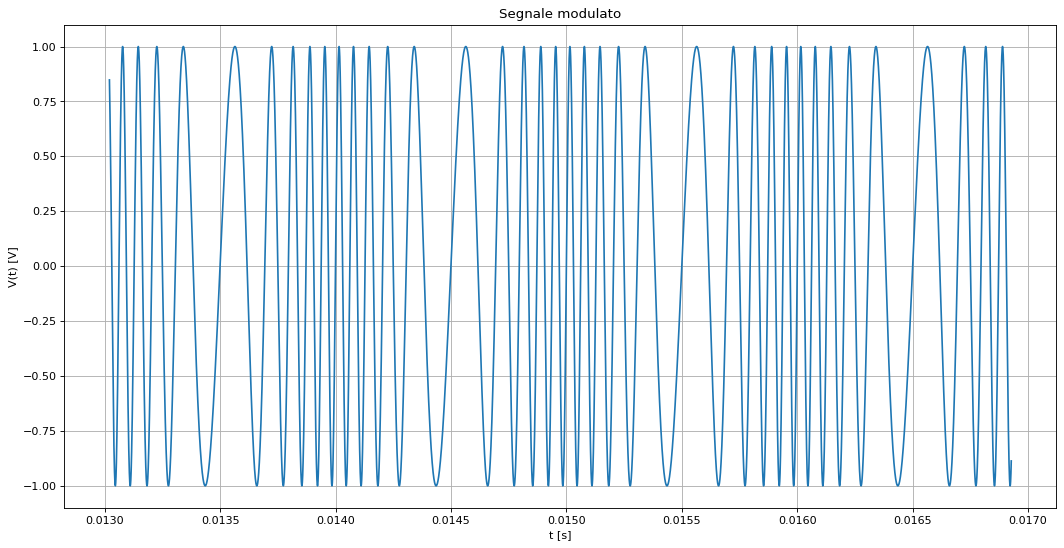

In [31]:
# Modulated signal
modulated = np.zeros_like(modulator)

for i, t in enumerate(time):
    modulated[i] = np.sin(2.0 * np.pi * (CARRIER_FREQUENCY * t + modulator[i]))

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale modulato')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], modulated[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/modulato.png')

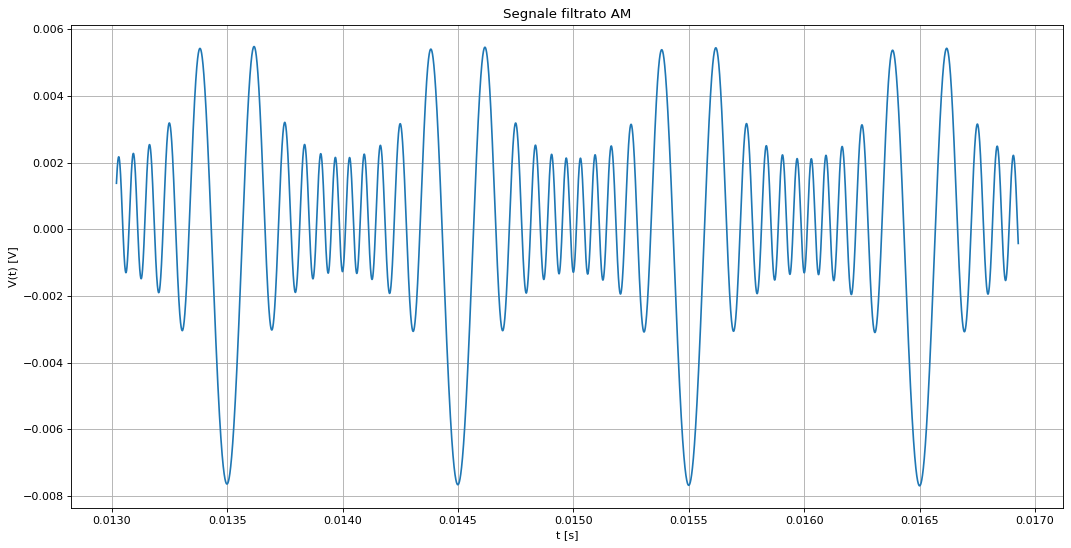

In [32]:
# Filtered signal
tau = 1 / (2 * np.pi * CARRIER_FREQUENCY * 0.7)
filtered = low_pass_filter(modulated, tau)

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Segnale filtrato AM')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], filtered[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/filtrato.png')

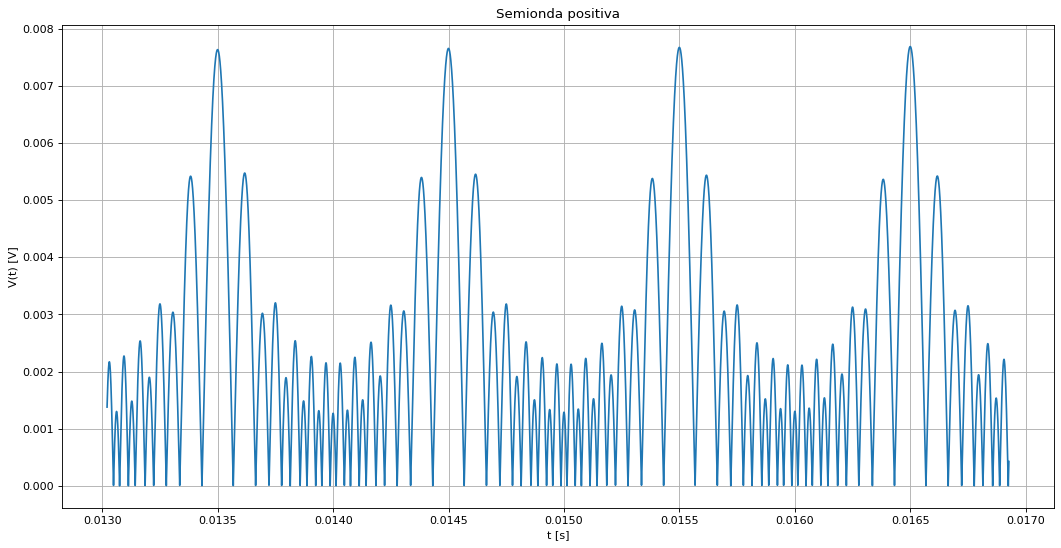

In [33]:
# Positive signal
positive = np.zeros_like(filtered)

for i, value in enumerate(filtered):
    positive[i] = abs(value)

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Semionda positiva')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], positive[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/positivo.png')

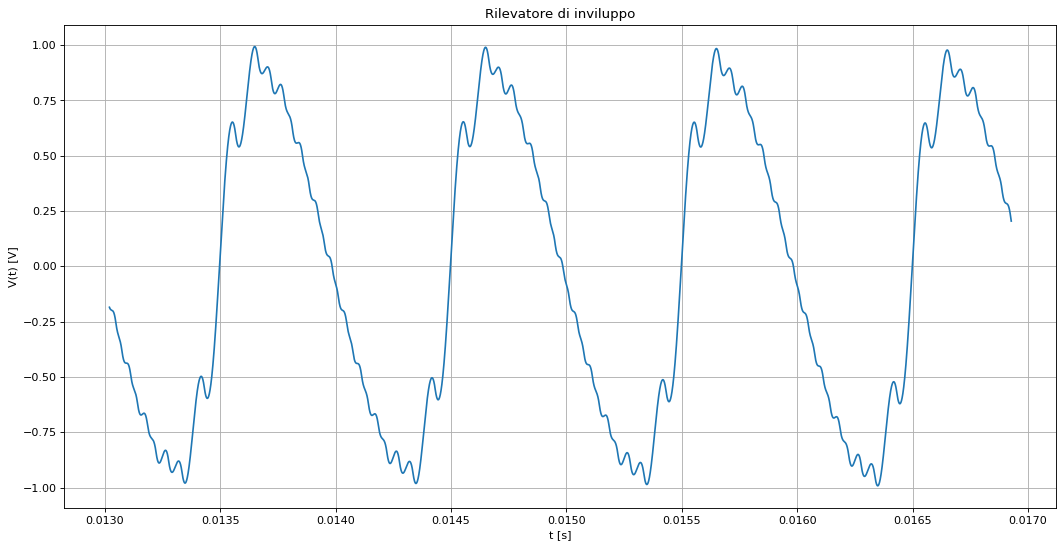

In [34]:
# Envelope detected signal
tau = 1 / (2 * np.pi * MODULATOR_FREQUENCY * 3)
envelope = low_pass_filter(positive, tau)

envelope -= 0.00233
envelope *= 0.82 * 10**4

plt.figure(figsize=PLOT_SCALE, dpi=80)
plt.grid(True)
plt.title('Rilevatore di inviluppo')
plt.plot(time[PLOT_OFFSET:PLOT_SAMPLES], envelope[PLOT_OFFSET:PLOT_SAMPLES])
plt.ylabel('V(t) [V]')
plt.xlabel('t [s]')

plt.savefig('doc/images/inviluppo.png')